<a href="https://colab.research.google.com/github/Vannod/Simulacion-I/blob/main/P3/Problema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Otras aplicaciones


---

Una tienda pequeña tiene un lote de estacionamiento con 6 lugares disponibles. Los clientes llegan en forma aleatoria de acuerdo a un proceso poisson a una razón media de 10 clientes por hora, y se van inmediatamente si no existen lugares disponibles en el estacionamiento. El tiempo que un auto permanece en el estacionamiento sigue una distribución uniforme entre 10 y 30 minutos.

a) ¿Qué porcentaje de los clientes es perdido por no tener más lugares disponibles?

b) ¿Cuál es la probabilidad de encontrar un lugar disponible en el estacionamiento?

c) ¿Cuál es el porcentaje promedio de espacios disponibles?

## Parámetros de la simulación

Tasa de llegadas $=10$ clientes por hora

Lugares disponibles $=6$

Tiempo de permanencia $=U(10, 30)$ minutos

## Librerías

In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Solución por simulación

In [35]:
n = 10000  # Número de clientes
llegadas = 10  # Llegadas por hora
llegadas_minuto = llegadas / 60  # Llegadas por minuto
num_lugares = 6  # Número de lugares en el estacionamiento
tiempo_simulacion = 10 * 60  # Hacemos la simulación para un tiempo de 10 horas
iteraciones = 1000  # Número de iteraciones

# Función para ejecutar una simulación
def Simulacion():
    clientes_perdidos = 0
    clientes_totales = 0
    espacios_disponibles = []
    tiempo_libre = [0] * num_lugares  # Tiempo en que cada lugar estará libre

    # Proceso de Poisson
    tiempos_llegada = np.cumsum(np.random.exponential(scale=1/llegadas_minuto, size=n))

    # Generación de tiempos de permanencia (distribución uniforme)
    permanencia = np.random.uniform(10, 30, size=n)

    # Simulación
    for i in range(n):
        tiempo_actual = tiempos_llegada[i]
        if tiempo_actual > tiempo_simulacion:
            break

        # Estado del estacionamiento
        tiempo_libre = [max(0, t - (tiempo_actual - (tiempos_llegada[i-1] if i > 0 else 0))) for t in tiempo_libre]

        if 0 in tiempo_libre:
            # Hay un lugar disponible
            lugar_disponible = tiempo_libre.index(0)
            tiempo_libre[lugar_disponible] = permanencia[i]
        else:
            # No hay lugares disponibles
            clientes_perdidos += 1

        clientes_totales += 1
        espacios_disponibles.append(tiempo_libre.count(0))

    # Resultados
    porcentaje_perdidos = (clientes_perdidos / clientes_totales) * 100
    probabilidad_lugar_disponible = (np.mean([1 if x > 0 else 0 for x in espacios_disponibles])) * 100
    porcentaje_espacios_disponibles = (np.mean(espacios_disponibles) / num_lugares) * 100

    return porcentaje_perdidos, probabilidad_lugar_disponible, porcentaje_espacios_disponibles

# Ejecutar simulaciones para bootstrap
resultados = [Simulacion() for _ in range(iteraciones)]
resultados = np.array(resultados)

# Calcular intervalos de confianza del 95%
intervalo_confianza = lambda datos: np.percentile(datos, [2.5, 97.5])

ic_perdidos = intervalo_confianza(resultados[:, 0])
ic_lugar_disponible = intervalo_confianza(resultados[:, 1])
ic_espacios_disponibles = intervalo_confianza(resultados[:, 2])

# Resultados medios
media_perdidos = resultados[:, 0].mean()
media_lugar_disponible = resultados[:, 1].mean()
media_espacios_disponibles = resultados[:, 2].mean()

# Imprimir resultados con intervalos de confianza
print(f"a) Porcentaje de clientes perdidos: {media_perdidos:.2f}%")
print(f"   Intervalo de confianza del 95%: [{ic_perdidos[0]:.2f}%, {ic_perdidos[1]:.2f}%]")

print(f"b) Probabilidad de encontrar un lugar disponible en el estacionamiento: {media_lugar_disponible:.2f}%")
print(f"   Intervalo de confianza del 95%: [{ic_lugar_disponible[0]:.2f}%, {ic_lugar_disponible[1]:.2f}%]")

print(f"c) Porcentaje promedio de espacios disponibles: {media_espacios_disponibles:.2f}%")
print(f"   Intervalo de confianza del 95%: [{ic_espacios_disponibles[0]:.2f}%, {ic_espacios_disponibles[1]:.2f}%]")


a) Porcentaje de clientes perdidos: 6.78%
   Intervalo de confianza del 95%: [1.15%, 13.69%]
b) Probabilidad de encontrar un lugar disponible en el estacionamiento: 80.79%
   Intervalo de confianza del 95%: [68.42%, 92.94%]
c) Porcentaje promedio de espacios disponibles: 34.13%
   Intervalo de confianza del 95%: [25.92%, 42.55%]


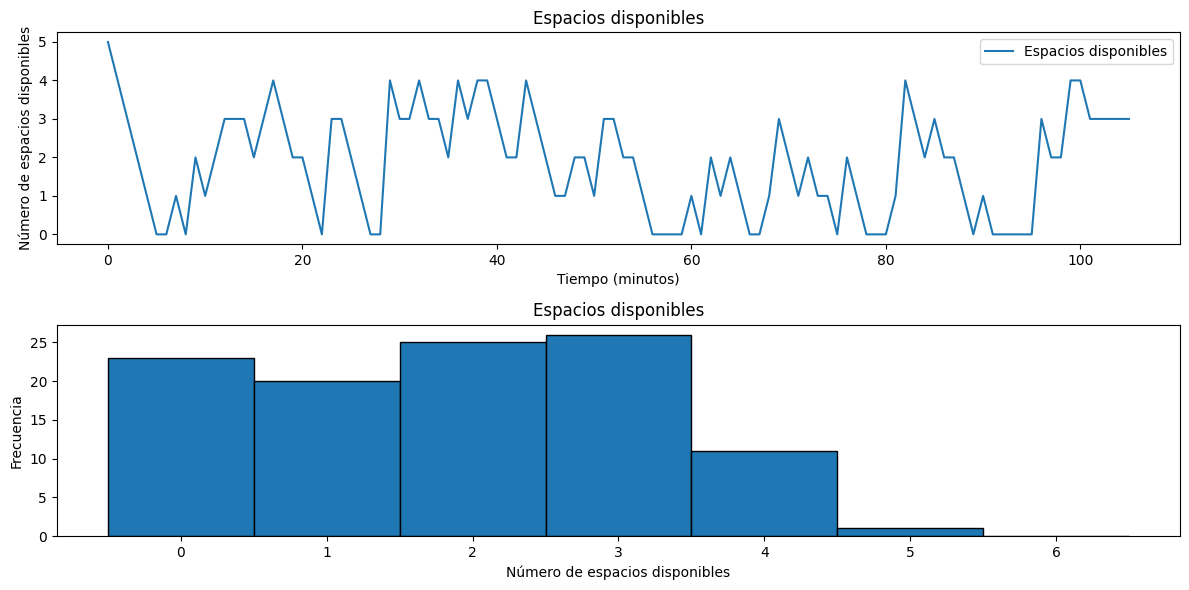

In [34]:
# Gráfico
tiempos = np.arange(len(espacios_disponibles))

plt.figure(figsize=(12, 6))

# Grafico de espacios disponibles a lo largo del tiempo
plt.subplot(2, 1, 1)
plt.plot(tiempos, espacios_disponibles, label='Espacios disponibles')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Número de espacios disponibles')
plt.title('Espacios disponibles')
plt.legend()

# Histograma de estado del estacionamiento
plt.subplot(2, 1, 2)
plt.hist(espacios_disponibles, bins=np.arange(num_lugares + 2) - 0.5, edgecolor='black', align='mid')
plt.xlabel('Número de espacios disponibles')
plt.ylabel('Frecuencia')
plt.title('Espacios disponibles')

plt.tight_layout()
plt.show()